<a href="https://colab.research.google.com/github/JuanMSarmientoU/alura-desafo-amigo-secreto/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



1. **Unificamos las tiendas**

Cada tienda tenía su propio archivo o DataFrame (`tienda`, `tienda2`, `tienda3`, `tienda4`). Para analizarlas juntas, las unimos en un solo DataFrame, añadiendo una columna nueva llamada "`Tienda`" que identifica de cuál tienda viene cada registro.

In [3]:
# Verificamos las columnas de cada tienda
print("Tienda 1:", tienda.columns)
print("Tienda 2:", tienda2.columns)
print("Tienda 3:", tienda3.columns)
print("Tienda 4:", tienda4.columns)

# Agregamos columna identificadora
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unificamos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

Tienda 1: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Tienda 2: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Tienda 3: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Tienda 4: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


2. **Creamos la columna de facturación**

La facturación de cada venta se calcula sumando:

El precio del producto ("`Precio`")

In [4]:
# Creamos columna de facturación
df['Facturación'] = df['Precio']


3. **Agrupamos por tienda**

Queríamos saber cuánto facturó cada tienda en total, así que agrupamos los datos por la columna "`Tienda`" y sumamos la facturación.

Moatramos resultados.

In [5]:
# Agrupamos por tienda
facturacion_por_tienda = df.groupby('Tienda')['Facturación'].sum().reset_index()

# Mostramos el resultado
facturacion_por_tienda

,Tienda,Facturación
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


4. **Formateamos los números para que se vean claros**

Como los valores eran muy grandes, los hicimos más legibles de dos formas:

Opción 1: Con separador de miles (305,000,000)

Opción 2: En millones, redondeado (305.00)

In [6]:
# Formatear con separador de miles
facturacion_por_tienda['Facturación'] = facturacion_por_tienda['Facturación'].map('{:,.0f}'.format)

# Mostrar tabla más clara
print(facturacion_por_tienda)


     Tienda    Facturación
0  Tienda 1  1,150,880,400
1  Tienda 2  1,116,343,500
2  Tienda 3  1,098,019,600
3  Tienda 4  1,038,375,700


# 2. Ventas por categoría

1. **Agrupar por tienda y categoría**

Queremos contar cuántos productos se vendieron por categoría en cada tienda. Para eso, usamos `.groupby()` + `.size()` o `.count()`.

2. Ver el resultado
Esto nos da una tabla con 3 columnas:

`Tienda`

`Categoría del Producto`

`Cantidad Vendida` (es decir, cuántas veces se vendió algo de esa categoría en esa tienda)

In [7]:
ventas_por_categoria = df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
print(ventas_por_categoria)

      Tienda   Categoría del Producto  Cantidad Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles               442
16  Tienda 3  Artículos para el hogar           

3. **Ordenar y tomar la categoría más popular de cada tienda**

Ordenamos por cantidad vendida (de mayor a menor) y luego seleccionamos la categoría con más ventas por tienda.

Mostramos resultados.

In [8]:
categorias_populares = ventas_por_categoria.sort_values('Cantidad Vendida', ascending=False)
categorias_populares = categorias_populares.groupby('Tienda').first().reset_index()
print("Categorías más populares por tienda:")
print(categorias_populares)


Categorías más populares por tienda:
     Tienda Categoría del Producto  Cantidad Vendida
0  Tienda 1                Muebles               465
1  Tienda 2                Muebles               442
2  Tienda 3                Muebles               499
3  Tienda 4                Muebles               480


4. **Categoría menos vendida por tienda**

Ordenamos por cantidad vendida (de menor a mayor) y luego seleccionamos la categoría con menos ventas por tienda.

Mostramos resultados.

In [9]:
categorias_menos_vendidas = ventas_por_categoria.sort_values('Cantidad Vendida', ascending=True)
categorias_menos_vendidas = categorias_menos_vendidas.groupby('Tienda').first().reset_index()
print("Categorías menos vendidas por tienda:")
print(categorias_menos_vendidas)


Categorías menos vendidas por tienda:
     Tienda   Categoría del Producto  Cantidad Vendida
0  Tienda 1  Artículos para el hogar               171
1  Tienda 2  Artículos para el hogar               181
2  Tienda 3  Artículos para el hogar               177
3  Tienda 4   Instrumentos musicales               170


# 3. Calificación promedio de la tienda


1. **Agrupar por tienda**

Usamos `.groupby`() y `.mean`() sobre la columna "`Calificación`":

2. **Redondear**

Para que sea más claro, podemos redondear a 2 decimales.
mostramos resultados

3. **Redondear de mayor a menor**


In [34]:
calificacion_promedio = df.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio['Calificación Promedio'] = calificacion_promedio['Calificación'].round(2)
calificacion_promedio = calificacion_promedio[['Tienda', 'Calificación Promedio']]
calificacion_promedio = calificacion_promedio.sort_values('Calificación Promedio', ascending=False)

print(calificacion_promedio)


     Tienda  Calificación Promedio
2  Tienda 3                   4.05
1  Tienda 2                   4.04
3  Tienda 4                   4.00
0  Tienda 1                   3.98


# 4. Productos más y menos vendidos

1. **Obtener el producto más vendido de cada tienda**

Ordenamos las ventas de mayor a menor y luego tomamos solo el primero de cada tienda.

visualisamos resultados.

In [46]:
ventas_por_producto = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')
productos_populares = ventas_por_producto.sort_values('Cantidad Vendida', ascending=False)
productos_populares = productos_populares.groupby('Tienda').first().reset_index()
print("Productos más vendidos por tienda:")
print(productos_populares)

Productos más vendidos por tienda:
     Tienda                   Producto  Cantidad Vendida
0  Tienda 1              TV LED UHD 4K                60
1  Tienda 2  Iniciando en programación                65
2  Tienda 3              Kit de bancas                57
3  Tienda 4                   Cama box                62


2. **Obtener el producto menos vendido de cada tienda**

Ordenamos las ventas de menor a mayor y luego tomamos solo el primero de cada tienda.

visualisamos resultados.

In [22]:
productos_menos_vendidos = ventas_por_producto.sort_values('Cantidad Vendida', ascending=True)
productos_menos_vendidos = productos_menos_vendidos.groupby('Tienda').first().reset_index()
print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos)


Productos menos vendidos por tienda:
     Tienda                   Producto  Cantidad Vendida
0  Tienda 1  Auriculares con micrófono                33
1  Tienda 2              Juego de mesa                32
2  Tienda 3    Bloques de construcción                35
3  Tienda 4         Guitarra eléctrica                33


# 5. Envío promedio por tienda

1. Agrupar por tienda y calcular el promedio del costo de envío.
2. Redondear.
Para que los valores sean más claros.
3. Ordenar de mayor a menor.
Si quieres ver qué tienda gasta más en envíos.
4. Mostrar resultado.

In [23]:
costo_envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio['Costo Promedio de Envío'] = costo_envio_promedio['Costo de envío'].round(2)
costo_envio_promedio = costo_envio_promedio[['Tienda', 'Costo Promedio de Envío']]
costo_envio_promedio = costo_envio_promedio.sort_values('Costo Promedio de Envío', ascending=False)
print("Costo promedio de envío por tienda (de mayor a menor):")
print(costo_envio_promedio)

Costo promedio de envío por tienda (de mayor a menor):
     Tienda  Costo Promedio de Envío
0  Tienda 1                 26018.61
1  Tienda 2                 25216.24
2  Tienda 3                 24805.68
3  Tienda 4                 23459.46


# **Visualización**

**Import Matplotlib**

In [40]:
import matplotlib.pyplot as plt

**1. Gráfico de barras: Facturación por tienda**

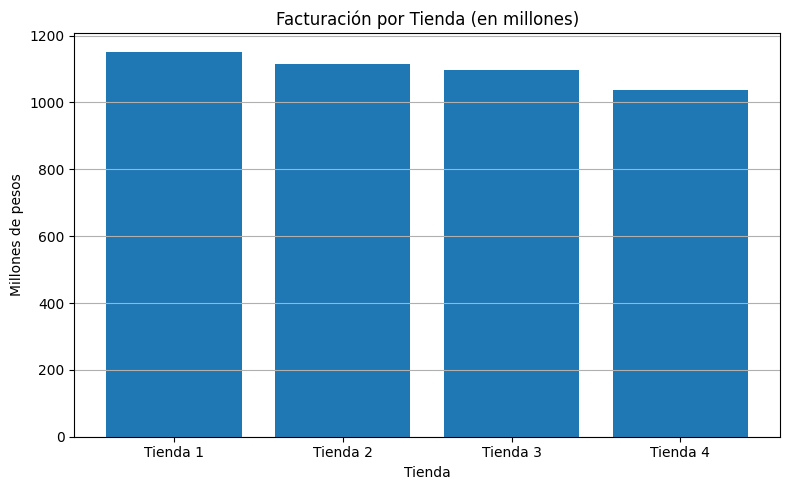

In [43]:
# Crear columna de facturación (solo Precio)
df['Facturación'] = df['Precio']

# Agrupar y calcular facturación total
facturacion_por_tienda = df.groupby('Tienda')['Facturación'].sum().reset_index()
facturacion_por_tienda['Facturación (Millones)'] = (facturacion_por_tienda['Facturación'] / 1_000_000).round(2)

plt.figure(figsize=(8, 5))
plt.bar(facturacion_por_tienda['Tienda'], facturacion_por_tienda['Facturación (Millones)'])
plt.title('Facturación por Tienda (en millones)')
plt.xlabel('Tienda')
plt.ylabel('Millones de pesos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2. Barras horizontales: Categorías más vendidas**

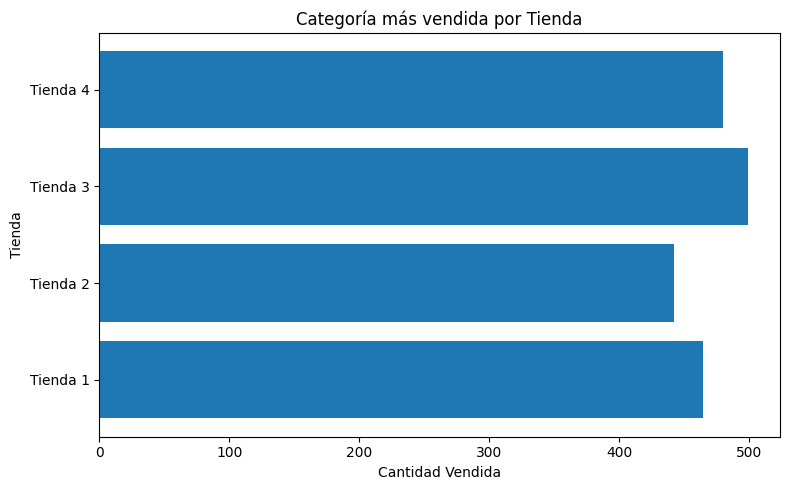

In [44]:
# Agrupar ventas por categoría
ventas_por_categoria = df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Tomar la categoría con más ventas por tienda
categorias_populares = ventas_por_categoria.sort_values('Cantidad Vendida', ascending=False).groupby('Tienda').first().reset_index()

# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(categorias_populares['Tienda'], categorias_populares['Cantidad Vendida'])
plt.title('Categoría más vendida por Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Tienda')
plt.tight_layout()
plt.show()

**3. Gráfico circular: Productos más vendidos**

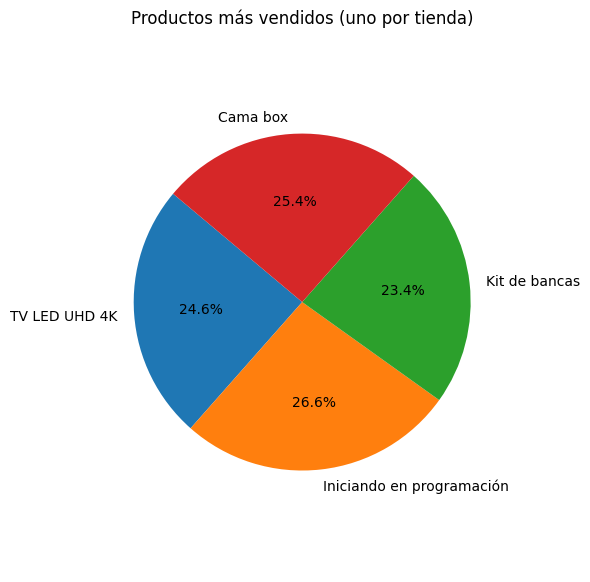

In [45]:
# Agrupar ventas por producto
ventas_por_producto = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Tomar el más vendido por tienda
productos_populares = ventas_por_producto.sort_values('Cantidad Vendida', ascending=False).groupby('Tienda').first().reset_index()

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(productos_populares['Cantidad Vendida'], labels=productos_populares['Producto'],
        autopct='%1.1f%%', startangle=140)
plt.title('Productos más vendidos (uno por tienda)')
plt.axis('equal')  # Hacer el círculo proporcional
plt.tight_layout()
plt.show()


# **Informe Final - Recomendación para el Sr. Juan**

## Introducción

El presente análisis tiene como objetivo ayudar al Sr. Juan a tomar una decisión informada sobre cuál de sus cuatro tiendas de la cadena Alura Store LATAM debería vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron distintas métricas clave relacionadas con el desempeño comercial de cada tienda: ingresos, productos más y menos vendidos, calificaciones de los clientes, categorías más populares y costos logísticos.

Se realizó un análisis detallado considerando múltiples factores clave:
- Ingresos totales por tienda (facturación)
- Categorías de productos más y menos vendidas
- Productos más y menos vendidos
- Calificaciones promedio de los clientes
- Costos de envío promedio

## Desarrollo del análisis

###Facturación total por tienda

Se calculó la facturación total usando exclusivamente el precio de los productos vendidos. Los resultados mostraron:

**Tienda 1** tiene la facturación **más alta**.

**Tienda 4** presenta la facturación **más baja** de las cuatro.

Esto indica que Tienda 4 tiene un rendimiento más débil en cuanto a ventas brutas.

###  Categorías más y menos vendidas

Al analizar las categorías de productos:

- La **categoría más popular** en todas las tiendas fue consistentemente **“Muebles”**.
- Sin embargo, la **categoría menos vendida** varía por tienda, mostrando debilidades particulares en ciertos tipos de productos.

### Productos más y menos vendidos

Cada tienda presentó un producto estrella diferente. Por ejemplo:

- Tienda 2 destacó con un libro educativo.
- Tienda 3 tuvo como más vendido un equipo de ejercicio.

También se identificaron productos con muy poca rotación por tienda, especialmente en Tienda 3.


### Calificación promedio de clientes

El análisis de la satisfacción del cliente reveló que:

- **Tienda 1** y **Tienda 4** recibieron las mejores calificaciones promedio.
- **Tienda 3** tuvo la **calificación más baja**, lo que refleja potenciales problemas en la experiencia de compra o postventa.


### Costo de envío promedio

Se calculó el costo logístico promedio por tienda:

- **Tienda 3** fue una de las tiendas con **mayor costo de envío promedio**, lo que puede estar reduciendo su rentabilidad.


## Conclusión y recomendación

Después de analizar todos los factores clave, se concluye que **la tienda que debería vender el Sr. Juan es la _Tienda 3_**.


### Justificación

- Es una de las **que menos factura**.
- Tiene la **calificación promedio más baja**, lo que indica menor satisfacción del cliente.
- Presenta **productos con baja rotación**.
- Tiene uno de los **costos de envío más altos**, afectando el margen de ganancia.

En contraste, Tienda 1 y Tienda 4 se posicionan como operaciones más sólidas, con buenos ingresos, calificaciones altas y categorías bien posicionadas.

Por lo tanto, vender **Tienda 3** permitirá al Sr. Juan deshacerse del punto de venta menos rentable y menos valorado, liberando recursos para invertir en un emprendimiento más prometedor.